#### Problem Statement:-
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
!pip install autoscraper

In [2]:
!pip install Afinn

## 1. Importing Autoscraper for extracting reviews from Amazon

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from autoscraper import AutoScraper
import warnings
warnings.filterwarnings('ignore')

## 2. Scraping reviews from Amazon

*Taking URL and the first review in List*

In [4]:
url1 = "https://www.amazon.in/Redmi-9A-2GB-32GB-Storage/product-reviews/B08696XB4B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
lis1 = ["Both 13 MP and 5MP Camera quality is good. Have lot of pre installed apps. But can be uninstalled if not required. Overall good performance . I am using Asus zenfone max and according to me far better than Asus except Camera quality. It comes in 5000 mah battery and one can't get a better option at this price range. Go for it. It's really goodAfter one week useEdit:- please don't buy this phone. It hangs a lot and sometimes there is problem in touch screen."] 

In [5]:
scraper = AutoScraper()

In [6]:
result1 = scraper.build(url1, lis1)
result1

["Both 13 MP and 5MP Camera quality is good. Have lot of pre installed apps. But can be uninstalled if not required. Overall good performance . I am using Asus zenfone max and according to me far better than Asus except Camera quality. It comes in 5000 mah battery and one can't get a better option at this price range. Go for it. It's really goodAfter one week useEdit:- please don't buy this phone. It hangs a lot and sometimes there is problem in touch screen.",
 "Excellent mobile for daily use @7500/-. Don't belive in negative reviews at all. If course the product parts made in China, entire assembly, software all are of India. Even this mobile have no bloat ware or Chinese apps and it's 3gb variant is excellent and black colour looks great.Camera is good at it's price range and has autofocus and AI potrait feature.Regarding battery is really huge and with normal daily usage it lasts for about 24 hrs as of my experience. With heavy usage and gaming it lasts for 7-10 hrs.Regarding gamin

In [7]:
url2 = "https://www.amazon.in/Redmi-9A-2GB-32GB-Storage/product-reviews/B08696XB4B/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2"
lis2 = [" Cheap & Best phone in this range"]

In [8]:
result2 = scraper.build(url2, lis2)
result2

['Compass is not working, showing error as required sensor are not available,And everything is fine.',
 'Made in China product',
 'Cheap & Best phone in this range',
 'REALME batter than redmi now',
 "1. Display is excellent. Colors and sharpness is good.2. Descent cameras according to price.3. In hand feel of phone is good. It's slim and despite 5000 Mah battery, it feels light.4. Battery backup is good. Easily last one day.5. Performance is good according to price. Mediatek G25 does it job well. You can play COD and FREE FIRE easily at low settings.6. Speaker loudness is average but quality is good.7. MIUI 12 experience is amazing. No ads and reduced bloatware.",
 'Made in china...The country of origin should be mentioned in the description...Returning the Chinese crap',
 '1. Very bad quality mobile2. Poor display quality(looks very cheap)3. Sound is very low4. Cmaera is like 2mp camera5. Performance is very slow(lag while using phone)6. Will get better mobiles with this price.7. Thi

In [9]:
url3 = "https://www.amazon.in/Redmi-9A-2GB-32GB-Storage/product-reviews/B08696XB4B/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3"
lis3 = ["Good battery. But phone hangs a.lot. need to restart multiple times"]

In [10]:
result3 = scraper.build(url3, lis3)
result3

['No finger print....there is vast color difference in picture & actual . there is no matching in SEA BLUE color. piece received with DARK Blue colorotherwise good gadget at this price.',
 'Quite goodBattery and build quality is betterBut camera and speakers are okok.',
 'The media could not be loaded.\n                \n\n\n\n Hiiii',
 "Screen is big and crisp battery backup is great. You can find lag here and there but manageable don't expect gaming in this phone. Camera is below average. All together phone feels premium in look with below average performance. If tou are planning to buy in this budget no phone will beat this phone.",
 "This is not value for money product because this product have 1k gst which is make hiked priceMi Apps which is un-necessary apps which is take space in storage and you can also deleted system apps and mi app through adb fastboot tools.Back design is very good n beautiful and also have texture liked finish since they r polycarbonate body which is doesn'

In [11]:
result1 = pd.DataFrame(result1)
result2 = pd.DataFrame(result2)
result3 = pd.DataFrame(result3)

In [12]:
reviews = pd.concat([result1, result2, result3], axis=0).reset_index(drop=True)
reviews.columns = ["Comments"]
reviews.head()

,Comments
0,Both 13 MP and 5MP Camera quality is good. Hav...
1,Excellent mobile for daily use @7500/-. Don't ...
2,If you are looking for low budget phone this c...
3,"If I started to rating it's all features, it w..."
4,Battery is getting drained out quite fast. 7% ...


## 3. Data Analysis

In [13]:
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

#### *Lemmatization*

In [14]:
lemmatizer = WordNetLemmatizer()

*Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words*

In [15]:
corpus = []
for i in range(0, len(reviews)):
    cleaned = re.sub('[^a-zA-Z]', " ", reviews["Comments"][i]) 
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

In [16]:
data = pd.DataFrame({"Comments": corpus})
data

,Comments
0,mp mp camera quality good lot pre installed ap...
1,excellent mobile daily use belive negative rev...
2,looking low budget phone good choice wanna and...
3,started rating feature followed processor disp...
4,battery getting drained quite fast hr half hr ...
5,purchased mother decent product price range lo...
6,worst phone overall performance bakwaz buy alw...
7,good redmi type c fast charge sound low compar...
8,review one day full usage day usage overall di...
9,covid drastically changed everything look disp...


In [17]:
corpus

['mp mp camera quality good lot pre installed apps uninstalled required overall good performance using asus zenfone max according far better asus except camera quality come mah battery one get better option price range go really goodafter one week useedit please buy phone hang lot sometimes problem touch screen',
 'excellent mobile daily use belive negative review course product part made china entire assembly software india even mobile bloat ware chinese apps gb variant excellent black colour look great camera good price range autofocus ai potrait feature regarding battery really huge normal daily usage last hr experience heavy usage gaming last hr regarding gaming since gaming processor helio g equal snapdragon hyperdrive technology lag gaming better network connectivity make game aweful overall product excellent price range',
 'looking low budget phone good choice wanna android phone day day work really good playing heavy game hange obviously camera fine range start new device take 

In [18]:
joined_data = " ".join(corpus)
print(joined_data)

mp mp camera quality good lot pre installed apps uninstalled required overall good performance using asus zenfone max according far better asus except camera quality come mah battery one get better option price range go really goodafter one week useedit please buy phone hang lot sometimes problem touch screen excellent mobile daily use belive negative review course product part made china entire assembly software india even mobile bloat ware chinese apps gb variant excellent black colour look great camera good price range autofocus ai potrait feature regarding battery really huge normal daily usage last hr experience heavy usage gaming last hr regarding gaming since gaming processor helio g equal snapdragon hyperdrive technology lag gaming better network connectivity make game aweful overall product excellent price range looking low budget phone good choice wanna android phone day day work really good playing heavy game hange obviously camera fine range start new device take time later

## 4. Applying Bag of Words (Without N grams)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(corpus).toarray()
print(cv.vocabulary_)

{'mp': 265, 'camera': 58, 'quality': 337, 'good': 171, 'lot': 237, 'pre': 315, 'installed': 206, 'apps': 14, 'uninstalled': 418, 'required': 356, 'overall': 292, 'performance': 298, 'using': 429, 'asus': 17, 'zenfone': 447, 'max': 249, 'according': 1, 'far': 141, 'better': 37, 'except': 133, 'come': 82, 'mah': 242, 'battery': 30, 'one': 287, 'get': 165, 'option': 289, 'price': 320, 'range': 341, 'go': 170, 'really': 344, 'goodafter': 172, 'week': 438, 'useedit': 426, 'please': 306, 'buy': 55, 'phone': 299, 'hang': 183, 'sometimes': 387, 'problem': 324, 'touch': 412, 'screen': 364, 'excellent': 132, 'mobile': 260, 'daily': 99, 'use': 425, 'belive': 34, 'negative': 271, 'review': 360, 'course': 93, 'product': 327, 'part': 296, 'made': 241, 'china': 68, 'entire': 125, 'assembly': 16, 'software': 386, 'india': 204, 'even': 128, 'bloat': 44, 'ware': 435, 'chinese': 69, 'gb': 163, 'variant': 431, 'black': 42, 'colour': 81, 'look': 235, 'great': 177, 'autofocus': 18, 'ai': 7, 'potrait': 311, 

In [20]:
bow = pd.DataFrame(bow)
bow.head()

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from wordcloud import WordCloud, STOPWORDS

**Define a function to plot word cloud**

In [22]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

**Generate Word Cloud**

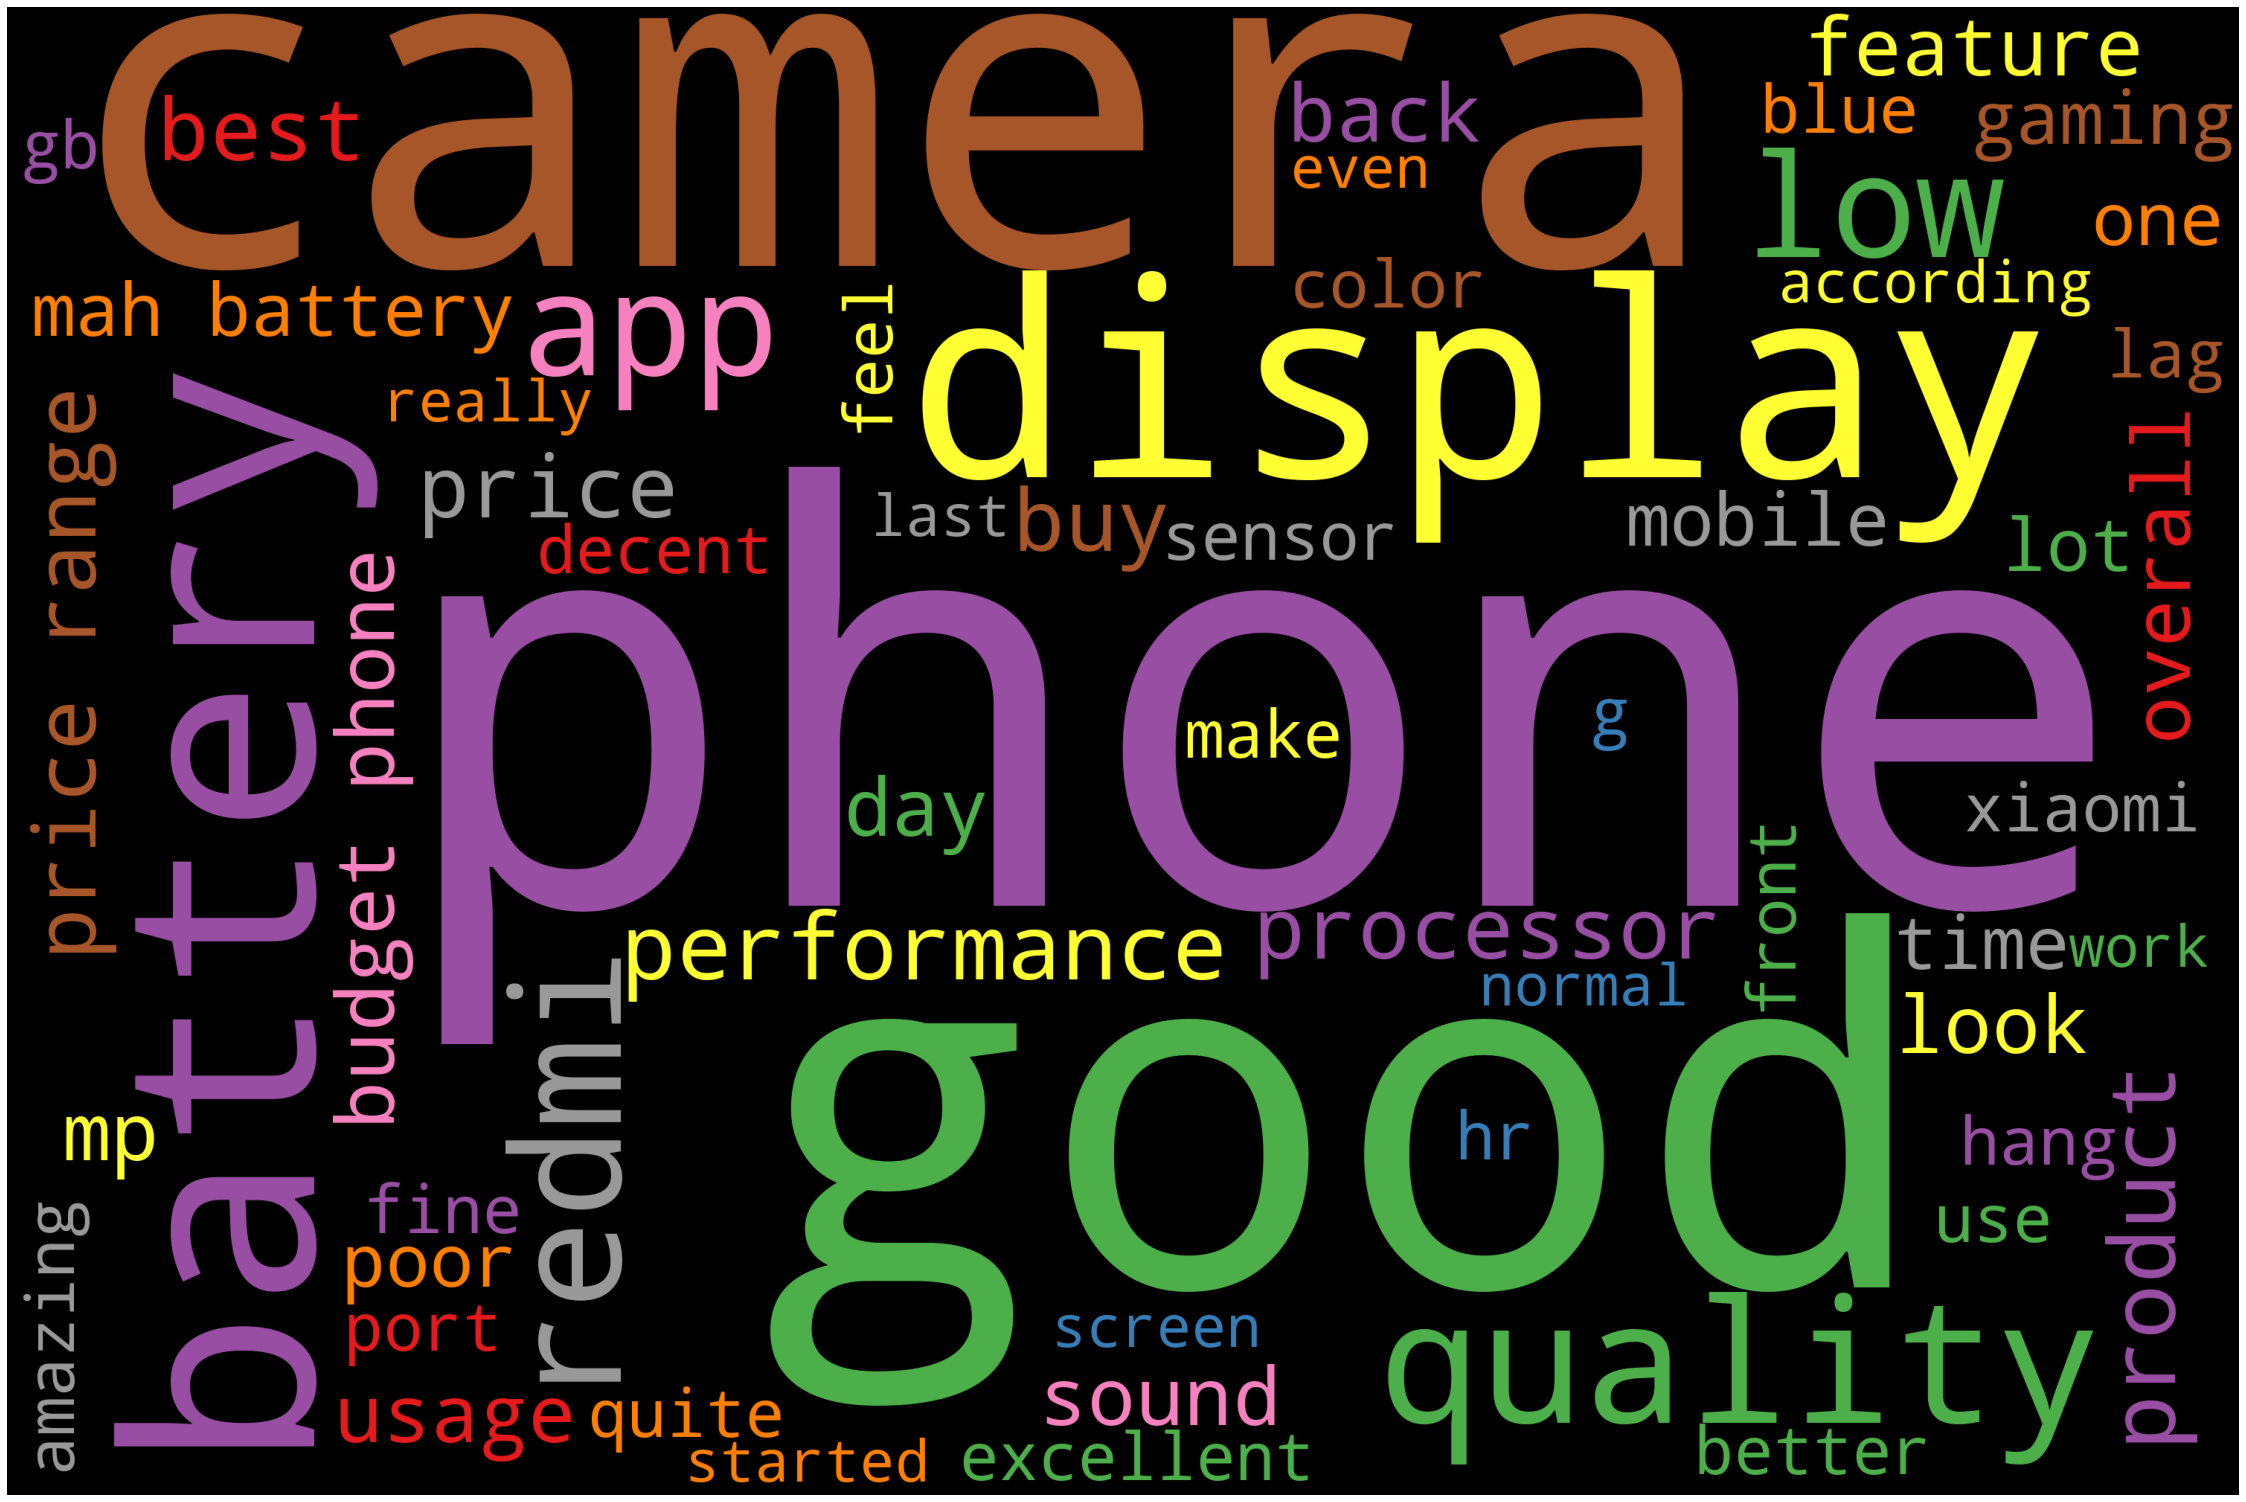

In [23]:
#STOPWORDS.add("ye")
wordcloud = WordCloud(width=3000,height=2000,background_color='black',max_words=60,
                   colormap='Set1',stopwords=STOPWORDS).generate(joined_data)
plot_cloud(wordcloud)

## 5. Sentiment Analysis

In [24]:
from afinn import Afinn  #Lexicon

In [25]:
af = Afinn(language='en', emoticons=False, word_boundary=True)

***User-defined function to measure affinity scores***

In [26]:
def score_cal(texts):
    score = []
    for i in range(0, len(texts)):
        sent_score = 0
        words = texts[i].split()
        for i in range(0, len(words)):
            af_score = af.score(words[i])
            sent_score += af_score
        score.append(sent_score)
    return score

In [27]:
score = score_cal(corpus)
score

[13.0,
 15.0,
 11.0,
 3.0,
 -6.0,
 28.0,
 -3.0,
 -1.0,
 3.0,
 9.0,
 0.0,
 0.0,
 3.0,
 0.0,
 23.0,
 -3.0,
 -3.0,
 -1.0,
 11.0,
 2.0,
 3.0,
 2.0,
 0.0,
 3.0,
 16.0,
 -2.0,
 17.0,
 14.0,
 3.0,
 0.0]

In [28]:
print(len(score))
print(len(corpus))

30
30


In [29]:
sentiment_df = pd.DataFrame({"Comment": corpus, "Sentiment_val": score })
sentiment_df

,Comment,Sentiment_val
0,mp mp camera quality good lot pre installed ap...,13.0
1,excellent mobile daily use belive negative rev...,15.0
2,looking low budget phone good choice wanna and...,11.0
3,started rating feature followed processor disp...,3.0
4,battery getting drained quite fast hr half hr ...,-6.0
5,purchased mother decent product price range lo...,28.0
6,worst phone overall performance bakwaz buy alw...,-3.0
7,good redmi type c fast charge sound low compar...,-1.0
8,review one day full usage day usage overall di...,3.0
9,covid drastically changed everything look disp...,9.0


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**